In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as smsA
import matplotlib.pyplot as plt



In [195]:
df_airline = pd.read_csv("airline_passengers.csv")

In [196]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [197]:
df_airline=df_airline.dropna(axis=0)

In [198]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [199]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [200]:
df_airline["Month"] = pd.to_datetime(df_airline["Month"])

In [201]:

df_airline.set_index("Month",inplace = True)
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

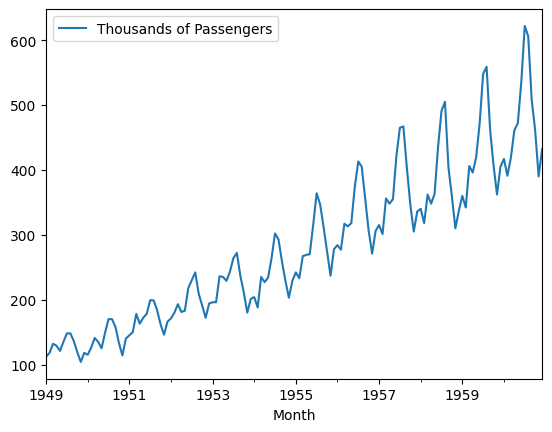

In [202]:
df_airline.plot()

In [203]:
#AD Fulle test function definition

from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print("ADF Statistics: {} ".format(result[0]))
    print("p value: {} ".format(result[1]))
    print("no of lags used : {} ".format(result[2]))
    print("obseravtions used : {} ".format(result[3]))
    if result[1] < 0.05:
        print("strong evidence against the null hypothesis , reject the null hypothesis therefore stationary ") 
    else:
        print("weak evidence against the null hypothesis , accept the null hypothesis therefore not stationary ")


In [204]:
adf_test(df_airline["Thousands of Passengers"])

ADF Statistics: 0.8153688792060463 
p value: 0.991880243437641 
no of lags used : 13 
obseravtions used : 130 
weak evidence against the null hypothesis , accept the null hypothesis therefore not stationary 


In [205]:
# use Techniques differencing
df_airline["Passenger's First Difference"]=df_airline["Thousands of Passengers"]-df_airline["Thousands of Passengers"].shift(1)

In [206]:
df_airline

,Thousands of Passengers,Passenger's First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0
...,...,...
1960-08-01,606.0,-16.0
1960-09-01,508.0,-98.0
1960-10-01,461.0,-47.0


In [207]:
adf_test(df_airline["Passenger\'s First Difference"].dropna())

ADF Statistics: -2.8292668241699923 
p value: 0.054213290283826474 
no of lags used : 12 
obseravtions used : 130 
weak evidence against the null hypothesis , accept the null hypothesis therefore not stationary 


In [208]:
df_airline["Passenger's Second_difference"]= df_airline["Passenger\'s First Difference"]-df_airline["Passenger\'s First Difference"].shift(1)

In [209]:
df_airline

,Thousands of Passengers,Passenger's First Difference,Passenger's Second_difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0
...,...,...,...
1960-08-01,606.0,-16.0,-103.0
1960-09-01,508.0,-98.0,-82.0
1960-10-01,461.0,-47.0,51.0


In [210]:
adf_test(df_airline["Passenger's Second_difference"].dropna())

ADF Statistics: -16.384231542468516 
p value: 2.7328918500141235e-29 
no of lags used : 11 
obseravtions used : 130 
strong evidence against the null hypothesis , reject the null hypothesis therefore stationary 


In [211]:
##Since it is seasonal data, we need to do it for 12 months(ARIMA doesnt usually work well , SARIMAX works well)
df_airline["Passenger's 12 difference"]= df_airline["Thousands of Passengers"]-df_airline["Thousands of Passengers"].shift(12)

In [212]:
adf_test(df_airline["Passenger's 12 difference"].dropna())

ADF Statistics: -3.383020726492481 
p value: 0.011551493085514954 
no of lags used : 1 
obseravtions used : 130 
strong evidence against the null hypothesis , reject the null hypothesis therefore stationary 


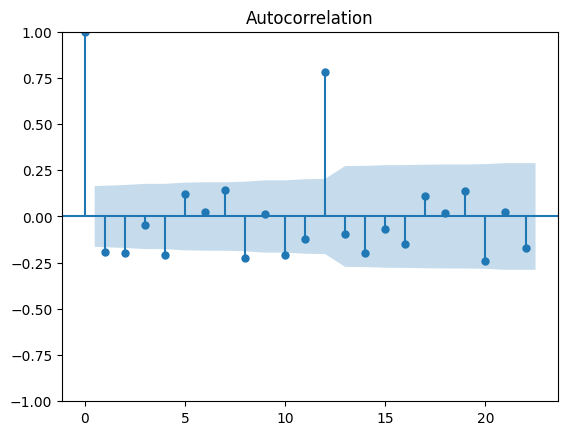

In [213]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(df_airline["Passenger\'s Second_difference"].dropna())


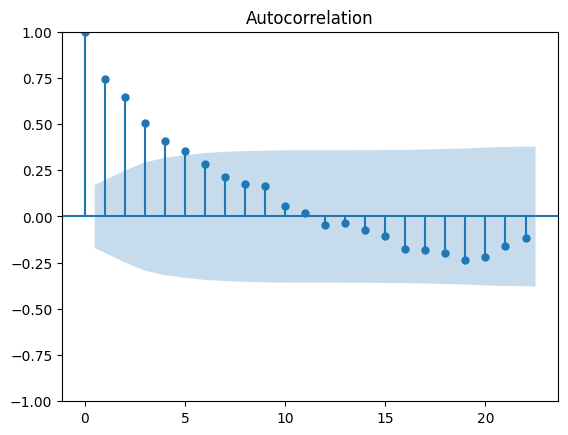

In [214]:
acf12 = plot_acf(df_airline["Passenger's 12 difference"].dropna())
#from graph , q =5

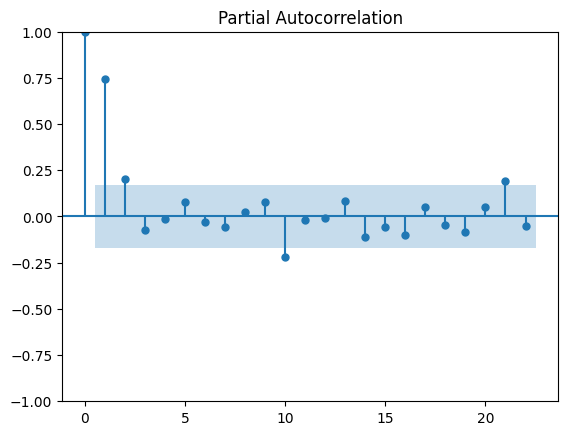

In [215]:
pacf12 = plot_pacf(df_airline["Passenger's 12 difference"].dropna())
#p=2 If it doesnt work fine, then p=10

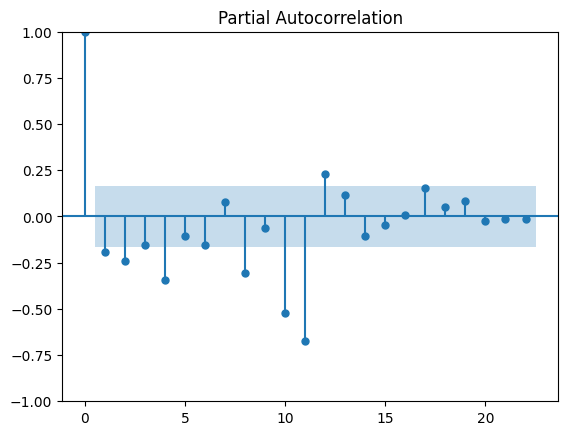

In [216]:
pacf = plot_pacf(df_airline["Passenger\'s Second_difference"].dropna())

In [217]:
df_airline

,Thousands of Passengers,Passenger's First Difference,Passenger's Second_difference,Passenger's 12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [218]:
from datetime import datetime , timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)
train_data = df_airline[:train_dataset_end]
test_data = df_airline[train_dataset_end + timedelta(days=1) : test_dataset_end]
 #Its like df_airline[fromdate:todate]

In [219]:
#Prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [220]:
test_data


,Thousands of Passengers,Passenger's First Difference,Passenger's Second_difference,Passenger's 12 difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [221]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(train_data["Thousands of Passengers"],order = (9,2,11))


c:\Users\Admin\Desktop\time series\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Admin\Desktop\time series\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Admin\Desktop\time series\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [222]:
model_fit = model_arima.fit()

c:\Users\Admin\Desktop\time series\env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Admin\Desktop\time series\env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


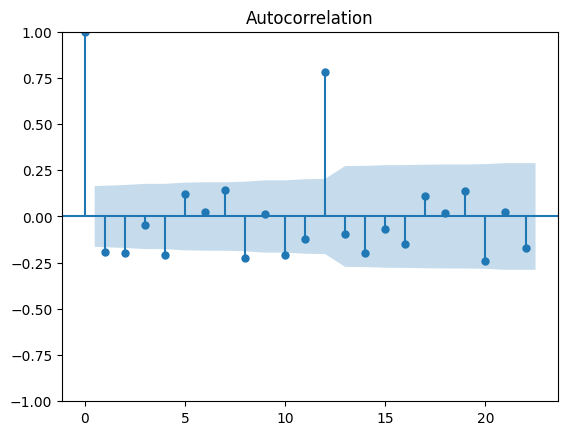

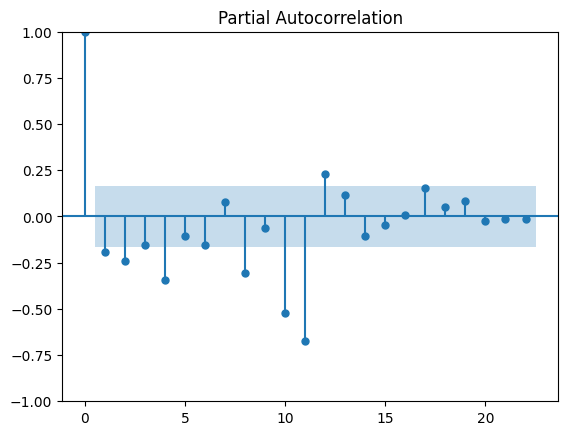

In [223]:
acf = plot_acf(df_airline["Passenger\'s Second_difference"].dropna())
pacf = plot_pacf(df_airline["Passenger\'s Second_difference"].dropna())

In [224]:
pred = model_fit.predict(start=pred_start_date,end=pred_end_date)

In [225]:
residuals = test_data["Thousands of Passengers"]-pred
print(residuals)

Month
1956-01-01     -6.609049
1956-02-01      1.629507
1956-03-01     38.716401
1956-04-01     23.641853
1956-05-01      4.681105
1956-06-01     14.024939
1956-07-01     22.935248
1956-08-01     40.067968
1956-09-01     12.258103
1956-10-01     -8.834156
1956-11-01    -24.490798
1956-12-01     -4.503578
1957-01-01     -0.206742
1957-02-01      2.749387
1957-03-01     61.939434
1957-04-01     38.237847
1957-05-01     19.798035
1957-06-01     38.296160
1957-07-01     51.016743
1957-08-01     75.866477
1957-09-01     33.995540
1957-10-01     -2.780965
1957-11-01    -27.064109
1957-12-01     -8.097824
1958-01-01     -3.914784
1958-02-01     -1.930994
1958-03-01     49.297685
1958-04-01     18.097942
1958-05-01      5.258622
1958-06-01     29.283378
1958-07-01     54.477561
1958-08-01     89.327453
1958-09-01      7.016636
1958-10-01    -25.318172
1958-11-01    -59.257200
1958-12-01    -40.880730
1959-01-01    -13.319672
1959-02-01     -0.914689
1959-03-01     73.290143
1959-04-01     44.8

<Axes: ylabel='Density'>

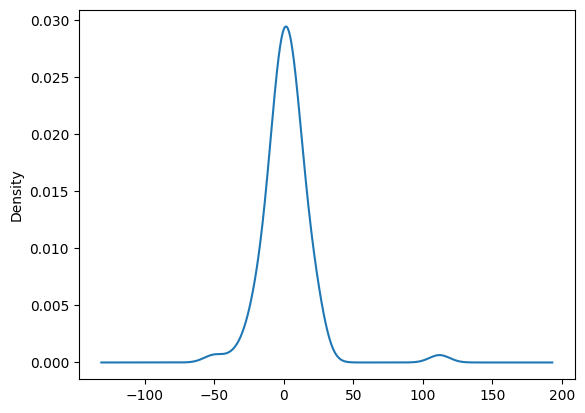

In [226]:
model_fit.resid.plot(kind = "kde")

C:\Users\Admin\AppData\Local\Temp\ipykernel_6076\2497503691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Predicted Arima"] = pred


<Axes: xlabel='Month'>

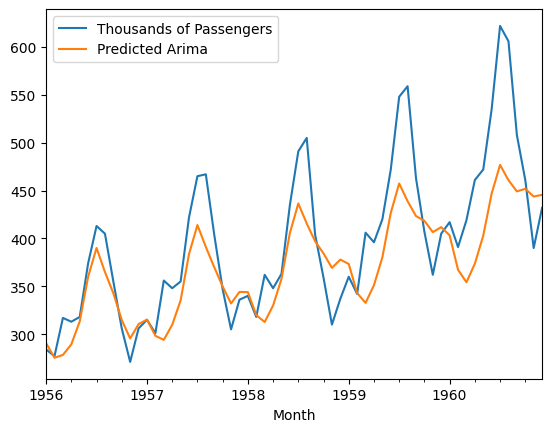

In [227]:
test_data["Predicted Arima"] = pred
test_data[["Thousands of Passengers", "Predicted Arima"]].plot()

In [234]:
#SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX
sari_modell = SARIMAX(train_data["Thousands of Passengers"],order=(3,0,5), seasonal_order=(0,1,0,12))


c:\Users\Admin\Desktop\time series\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Admin\Desktop\time series\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


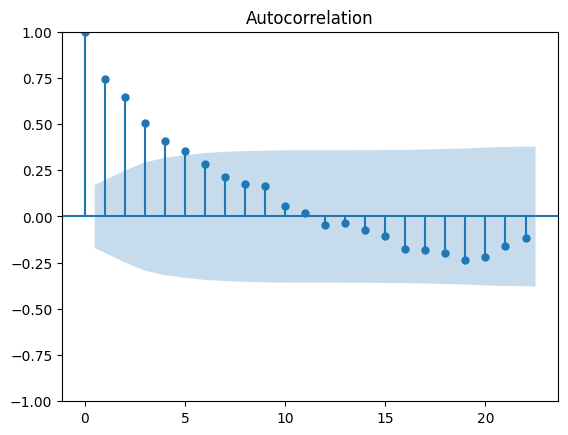

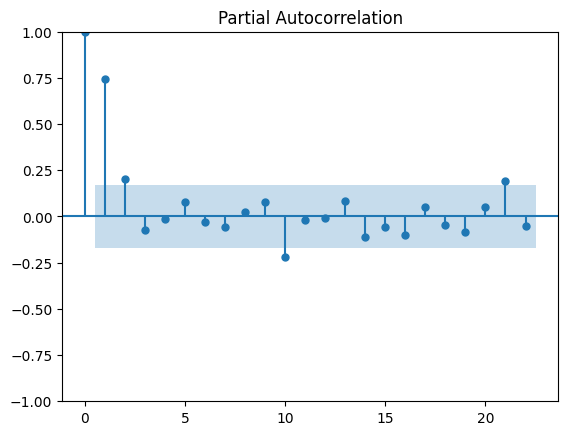

In [235]:
acf12 = plot_acf(df_airline["Passenger's 12 difference"].dropna())
pacf12 = plot_pacf(df_airline["Passenger's 12 difference"].dropna())

In [236]:
model_sarima_fit = sari_modell.fit()

c:\Users\Admin\Desktop\time series\env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [237]:
pred_sari = model_sarima_fit.predict(start=pred_start_date, end= pred_end_date)

<Axes: ylabel='Density'>

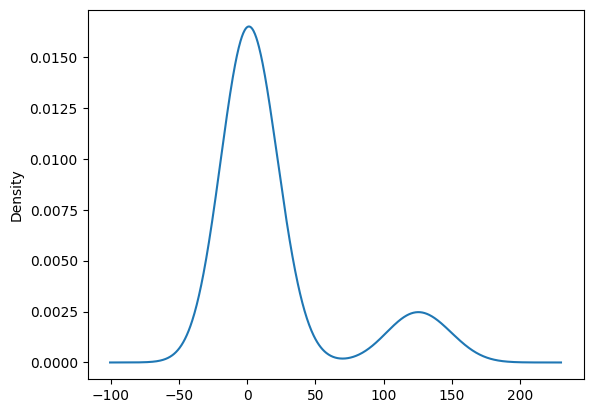

In [238]:
residuals_sar = test_data - pred_sari
model_sarima_fit.resid.plot(kind = "kde")

C:\Users\Admin\AppData\Local\Temp\ipykernel_6076\38506062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Predicted SArima"] = pred_sari


<Axes: xlabel='Month'>

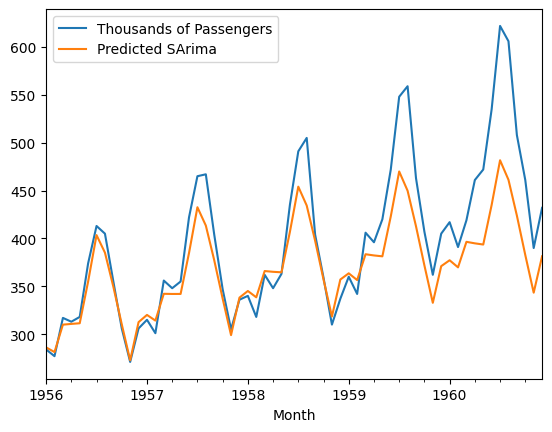

In [239]:
test_data["Predicted SArima"] = pred_sari
test_data[["Thousands of Passengers","Predicted SArima"]].plot()